# Logistic Regression
Data Mining Lab 3 by Keon, UVic Summer 2021 on June 1st 
<br><br> [Sci-kit learn documenation: Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br><br>
[Related article: Understanding Logistic Regression Tutorial](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)
<br><br>
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

*** NOTE: Differences between linear regression and logistic regression *** -->> [Reference website](https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning#:~:text=Linear%20regression%20is%20used%20to,given%20set%20of%20independent%20variables.&text=In%20logistic%20Regression%2C%20we%20predict%20the%20values%20of%20categorical%20variables.)

*** Definition of collinearity *** -- >> [Reference website](https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168)

*** NOTE Linear Regression vs Logistic Regression ***
1. Linear Reg. is to predict a continuous dependent variable based on values of independent variables; however, Logistic Reg. is to predict a categorical dependent variable based on values of independent variables.
2. Linear Reg. uses a least square estimation method but Logistic Reg. uses maximum likelihood function (simply but not accurate, you could think this value as an average probability for the specific case, it will be covered later).
3. Best fit line: linear line (linear relation) vs curve (flexible)

In [47]:
# import library 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# without above line matplotlib will not work in notebook
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# The import below is needed so that we can display full output in Jupyter, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [48]:
# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split into train and test dataset (Test_size:33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


[Solver explained article](https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451)
<br> <br>
C — float, optional, default = 1. Smaller values have more regularization. Inverse of regularization strength. Must be positive value. Usually search logarithmically: [.001, .01, .1, 1, 10, 100, 1000]

[NOTE: Parameter C explained Kaggle page](https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression)

In [49]:
model = LogisticRegression(C=1e5, multi_class="multinomial", solver="lbfgs", penalty="l2")
# remember that small value of C implies stronger regularization
model.fit(X_train, y_train)
predictions = model.predict(X_test) 


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [50]:
print("Accuracy (%):",metrics.accuracy_score(y_test, predictions)*100,"%")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

Accuracy (%): 98.0 %
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [51]:
# Split into train and test dataset (Test_size:60%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
X_train, X_test = X_train[:,:2], X_test[:,:2]
print(X_train.shape)
print(X_test.shape)

model = LogisticRegression(C=1e5, multi_class="multinomial", solver="lbfgs")
model.fit(X_train, y_train)
predictions = model.predict(X_test) 
print("Accuracy (%):",metrics.accuracy_score(y_test, predictions)*100,"%")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

(60, 2)
(90, 2)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

Accuracy (%): 80.0 %
Confusion Matrix:
[[35  0  0]
 [ 0 19 10]
 [ 0  8 18]]


In [52]:
# Examples the model predicted wrong
print(predictions[predictions != y_test])
print(y_test[predictions != y_test])
print(X_test[predictions != y_test])

[2 2 2 1 2 1 2 2 2 1 2 1 1 1 1 2 1 2]
[1 1 1 2 1 2 1 1 1 2 1 2 2 2 2 1 2 1]
[[6.8 2.8]
 [6.3 3.3]
 [6.7 3.1]
 [6.3 2.5]
 [6.4 3.2]
 [5.8 2.7]
 [6.  3.4]
 [6.7 3.1]
 [6.6 3. ]
 [6.3 2.7]
 [6.2 2.9]
 [5.7 2.5]
 [6.  3. ]
 [5.8 2.7]
 [6.4 2.7]
 [6.7 3. ]
 [5.8 2.8]
 [5.9 3.2]]


In [53]:
# Training errors
X_train[model.predict(X_train) != y_train]

array([[6.1, 2.6],
       [6. , 2.2],
       [6.5, 2.8],
       [6.2, 2.8],
       [7. , 3.2],
       [6.1, 3. ],
       [6.6, 2.9],
       [6.9, 3.1],
       [6.4, 2.9],
       [5.6, 2.8],
       [5.9, 3. ],
       [4.9, 2.5]])

In [54]:
probabilities = model.predict_proba(X_test)
print(probabilities)
print(np.argmax(probabilities, axis=1))
print(predictions)

[[2.33283575e-25 5.57105903e-01 4.42894097e-01]
 [9.99812897e-01 4.91369551e-05 1.37965589e-04]
 [1.33033269e-66 1.86284481e-01 8.13715519e-01]
 [4.07183421e-21 5.44992550e-01 4.55007450e-01]
 [1.04343196e-41 3.38178522e-01 6.61821478e-01]
 [9.99289355e-01 3.66745638e-04 3.43899509e-04]
 [8.24620244e-12 6.67128869e-01 3.32871131e-01]
 [2.21028504e-38 2.08648635e-01 7.91351365e-01]
 [3.30216826e-39 7.62545205e-01 2.37454795e-01]
 [2.67330175e-20 6.88509544e-01 3.11490456e-01]
 [4.18218133e-27 2.69732608e-01 7.30267392e-01]
 [1.00000000e+00 3.34098352e-10 7.11170667e-11]
 [9.98101212e-01 8.35059705e-04 1.06372829e-03]
 [9.99999999e-01 7.61629193e-10 2.20236687e-10]
 [1.00000000e+00 7.30335483e-19 9.47420160e-19]
 [1.59414267e-20 2.85721865e-01 7.14278135e-01]
 [6.83638547e-31 3.45096859e-01 6.54903141e-01]
 [1.62051453e-19 8.03112552e-01 1.96887448e-01]
 [4.69639551e-16 6.77912319e-01 3.22087681e-01]
 [2.35280194e-32 4.60916782e-01 5.39083218e-01]
 [1.00000000e+00 2.11655364e-16 5.651331

[[3.8  3.81 3.82 ... 8.17 8.18 8.19]
 [3.8  3.81 3.82 ... 8.17 8.18 8.19]
 [3.8  3.81 3.82 ... 8.17 8.18 8.19]
 ...
 [3.8  3.81 3.82 ... 8.17 8.18 8.19]
 [3.8  3.81 3.82 ... 8.17 8.18 8.19]
 [3.8  3.81 3.82 ... 8.17 8.18 8.19]]
!
[[1.7  1.7  1.7  ... 1.7  1.7  1.7 ]
 [1.71 1.71 1.71 ... 1.71 1.71 1.71]
 [1.72 1.72 1.72 ... 1.72 1.72 1.72]
 ...
 [4.47 4.47 4.47 ... 4.47 4.47 4.47]
 [4.48 4.48 4.48 ... 4.48 4.48 4.48]
 [4.49 4.49 4.49 ... 4.49 4.49 4.49]]


<Figure size 288x216 with 0 Axes>

mistakes: [[6.8 2.8]
 [6.3 3.3]
 [6.7 3.1]
 [6.3 2.5]
 [6.4 3.2]
 [5.8 2.7]
 [6.  3.4]
 [6.7 3.1]
 [6.6 3. ]
 [6.3 2.7]
 [6.2 2.9]
 [5.7 2.5]
 [6.  3. ]
 [5.8 2.7]
 [6.4 2.7]
 [6.7 3. ]
 [5.8 2.8]
 [5.9 3.2]]


Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.189999999999905)

(1.7000000000000002, 4.490000000000003)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

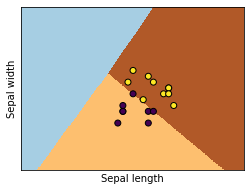

In [55]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
print(xx)
print ("!")
print(yy)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the points
prediction = model.predict(X_test)
mistake_index = (prediction != y_test)
temp_index0 = y_test == 0
temp_index1 = y_test == 1
temp_index2 = y_test == 2
c = np.array(mistake_index).astype(int)
c0 = np.array(temp_index0).astype(int)
c1 = np.array(temp_index1).astype(int)
c2 = np.array(temp_index2).astype(int)
index0 = c + c0
index1 = c + c1
index2 = c + c2

mistakes = X_test[mistake_index]
print("mistakes:",mistakes)

plt.scatter(mistakes[:,0], mistakes[:, 1], edgecolors='k', c=prediction[mistake_index])

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()



LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<Figure size 288x216 with 0 Axes>

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.400000000000004)

(1.5, 4.900000000000003)

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

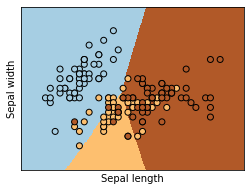

In [56]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=0.0001, multi_class="multinomial", solver="lbfgs", penalty="l2")
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

<Figure size 432x720 with 0 Axes>

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (train) for L1 logistic: 82.7% 


Text(0.5, 1.0, 'Class 0')

Text(0, 0.5, 'L1 logistic')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (train) for L2 logistic (Multinomial): 82.7% 


Text(0.5, 1.0, 'Class 0')

Text(0, 0.5, 'L2 logistic (Multinomial)')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (train) for L2 logistic (OvR): 79.3% 


Text(0.5, 1.0, 'Class 0')

Text(0, 0.5, 'L2 logistic (OvR)')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Accuracy (train) for Linear SVC: 82.0% 


Text(0.5, 1.0, 'Class 0')

Text(0, 0.5, 'Linear SVC')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

GaussianProcessClassifier(copy_X_train=True,
                          kernel=1**2 * RBF(length_scale=[1, 1]),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

Accuracy (train) for GPC: 82.7% 


Text(0.5, 1.0, 'Class 0')

Text(0, 0.5, 'GPC')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 1')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class 2')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Probability')

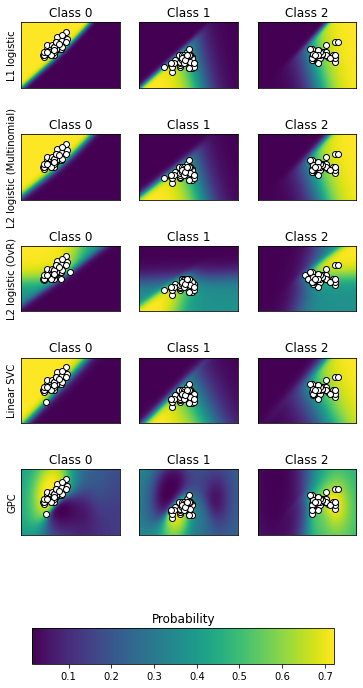

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)Accuracy (train) for L1 logistic: 82.7% 
  
--------------------------------------------
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)Accuracy (train) for L2 logistic (Multinomial): 82.7%

--------------------------------------------
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)Accuracy (train) for L2 logistic (OvR): 79.3%

--------------------------------------------
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)Accuracy (train) for Linear SVC: 82.0%

--------------------------------------------
GaussianProcessClassifier(copy_X_train=True,
                          kernel=1**2 * RBF(length_scale=[1, 1]),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)Accuracy (train) for GPC: 82.7% 

--------------------------------------------
Plot the classification probability for different classifiers. We use a 3 class dataset, and we classify it with a Support Vector classifier, L1 and L2 penalized logistic regression with either a One-Vs-Rest or multinomial setting, and Gaussian process classification.

--------------------------------------------
Linear SVC is not a probabilistic classifier by default but it has a built-in calibration option enabled in this example (probability=True).

--------------------------------------------
The logistic regression with One-Vs-Rest is not a multiclass classifier out of the box. As a result it has more trouble in separating class 2 and 3 than the other estimators.

## (Optional) Data Mining mini-project for Music Genre Classfication (Logistic Regression included) <br>
[Credit website](https://www.kaggle.com/andradaolteanu/work-w-audio-data-visualise-classify-recommend#)

![](https://i.imgur.com/LZB5LEa.png)

# Introduction

### Why are we doing this?
Music. Experts have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another.

In this notebook we will go through an in depth analysis of sound and how we can **visualize, classify and ultimately understand** it.

### The data:
* **genres original** - A collection of 10 genres with 100 audio files each, all having a length of 30 seconds (the famous GTZAN dataset, the MNIST of sounds)
* **images original** - A visual representation for each audio file. One way to classify data is through neural networks. Because NNs (like CNN, what we will be using today) usually take in some sort of image representation, the audio files were converted to Mel Spectrograms to make this possible (we'll be talking about this more in depth later)
* **2 CSV files** - Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file (more in depth later). The other file has the same structure, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models). *With data, more is always better*.

### Purpose:
1. We want to understand **what is an Audio file**. What features we can visualize on this kind of data.
2. **EDA (Exploratory Data Analysis)**. Always good, here very necessary.
3. **Genres Classification** on the 30 seconds CSV file (trying multiple models and identify which has the best accuracy)

### Credits and Acknowledgements ([Credit website](https://www.kaggle.com/andradaolteanu/work-w-audio-data-visualise-classify-recommend#)):
* This was a team project for uni, so the effort in creating this wasn't only my own. So, I want to thank **James Wiltshire, Lauren O'Hare and Minyu Lei** for being the best teammates ever and for having so much fun and learning so much during the 3 days we worked on this.
* You can do a lot of documentation online, but an article that helped us a lot in doing this was [Parul Pandey's](https://www.kaggle.com/parulpandey) notebook for [Music Genre Classification with Python](https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8)

In [74]:
### NOTE: Download GTZAN dataset
!wget --header="Host: opihi.cs.uvic.ca" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: it-IT,it;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: http://marsyas.info/downloads/datasets.html" "http://opihi.cs.uvic.ca/sound/genres.tar.gz" -O "genres.tar.gz" -c
!tar -xzf genres.tar.gz
# GTZAN Kaggle Analysis: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
!ls

--2021-06-01 00:40:04--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 1225571541 (1.1G), 1206275789 (1.1G) remaining [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz         3%[                    ]  36.54M  1.75MB/s    eta 11m 23s^C

gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now
'BPM Boxplot.jpg'  'Corr Heatmap.jpg'   genres	       'PCA Scattert.jpg'
'conf matrix.png'   drive	        genres.tar.gz   sample_data


In [58]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import os
general_path = '/content/drive/MyDrive/Colab Notebooks/NeuralSourceSeperationSpleeter/GTZAN_Data_Kaggle'
print(list(os.listdir(f'{general_path}/genres_original/')))

['rock', 'pop', 'metal', 'disco', 'hiphop', 'classical', 'blues', 'reggae', 'country', 'jazz']


# Explore Audio Data

We will use `librosa`, which is the mother of audio files.

## Understanding Audio
Let's first Explore our Audio Data to see how it looks (we'll work with `reggae.00036.wav` file).

* **Sound**: sequence of vibrations in varying pressure strengths (`y`)
* The **sample rate** (`sr`) is the number of samples of audio carried per second, measured in Hz or kHz

In [61]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/rock/rock.00001.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [62]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684] 

Audio File shape: (661794,)


### 2D Representation: Sound Waves

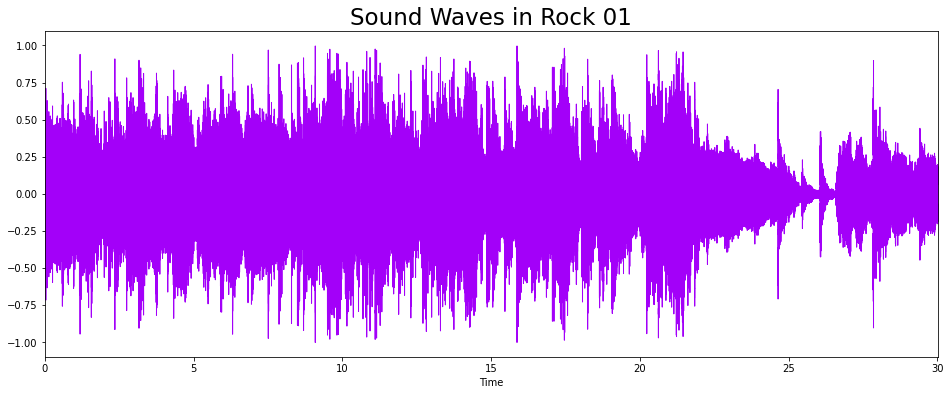

In [63]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Rock 01", fontsize = 23);

### Fourier Transform

* Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
* Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [64]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


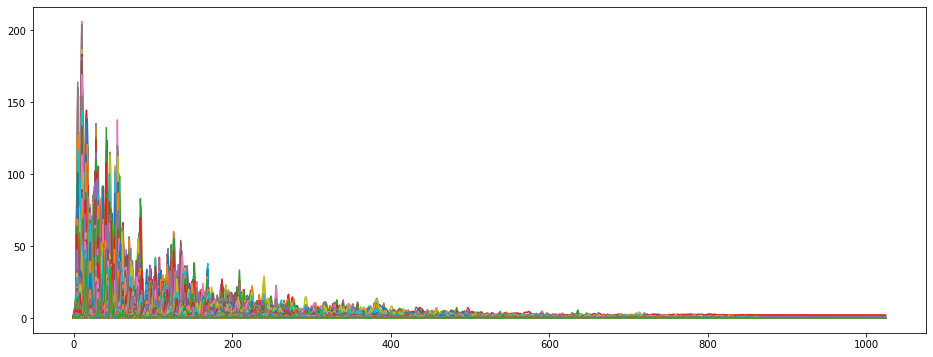

In [65]:
plt.figure(figsize = (16, 6))
plt.plot(D); 

### The Spectrogram

* What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams ([wiki](https://en.wikipedia.org/wiki/Spectrogram)).
* Here we convert the frequency axis to a logarithmic one.

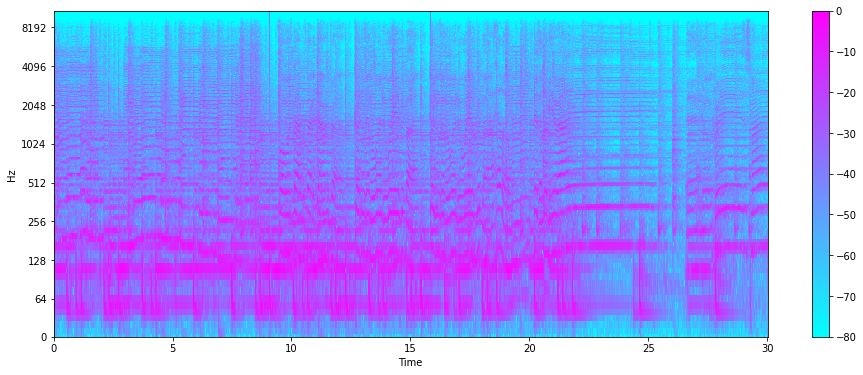

In [66]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

### Mel Spectrogram

* The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

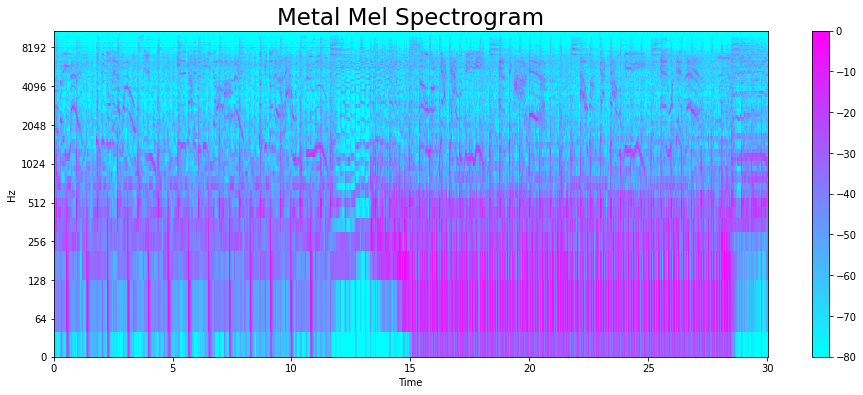

In [67]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

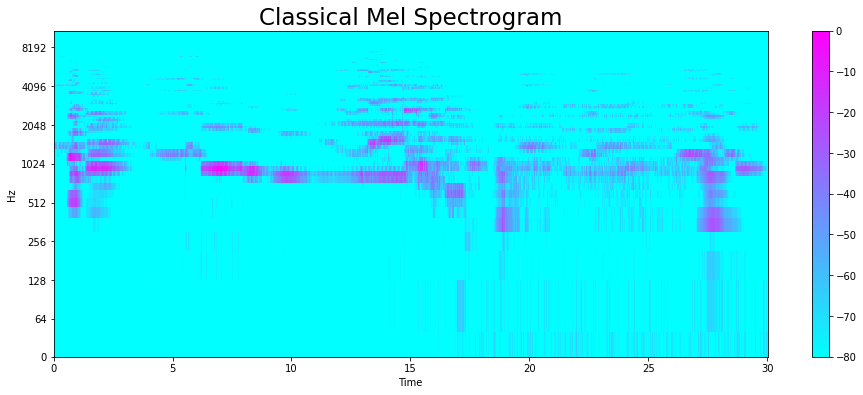

In [68]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

## Audio Features

### Zero Crossing Rate

* the rate at which the signal changes from positive to negative or back.

In [69]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

36426


### Harmonics and Percussive

* Harmonics are characteristichs that human years can't distinguish (represents the sound color)
* Percussive understanding shock wave represents the sound rhythm and emotion

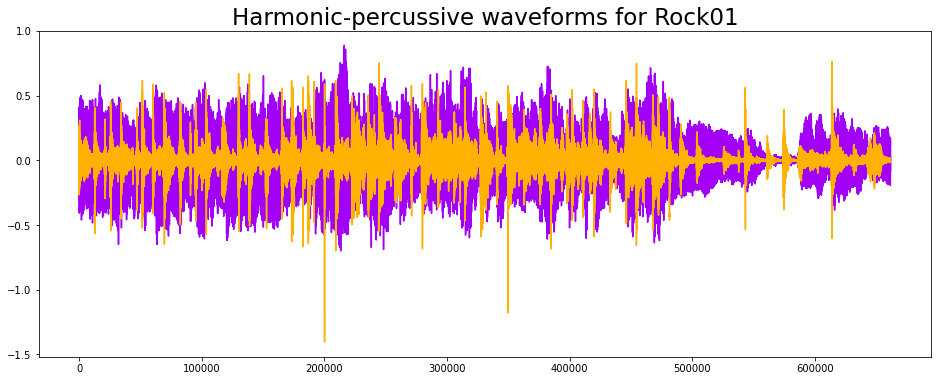

In [70]:
y_harm, y_perc = librosa.effects.hpss(audio_file) # Harmonic-percussive source separation (HPSS)
plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.title("Harmonic-percussive waveforms for Rock01", fontsize = 23);

### Tempo BPM (beats per minute)

Dynamic programming beat tracker.

In [71]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

107.666015625

### Spectral Centroid

* indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [72]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [2096.04739371 2181.66385212 2155.04066414 ... 1568.91491515 1533.15607651
 1494.14664179] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


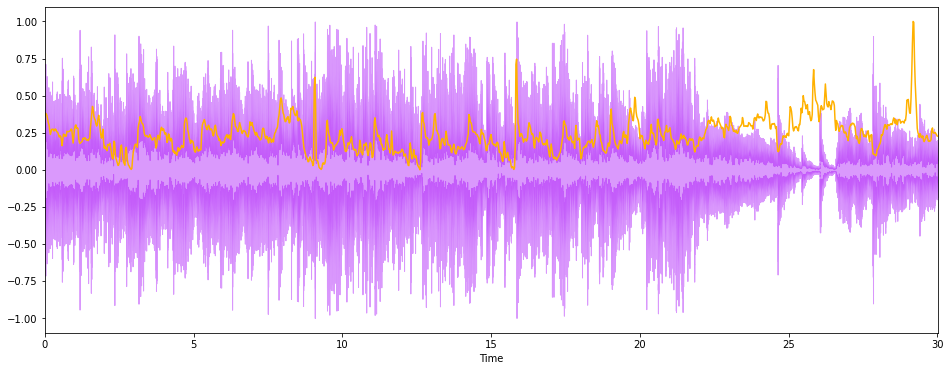

In [73]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

### Spectral Rolloff
* is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

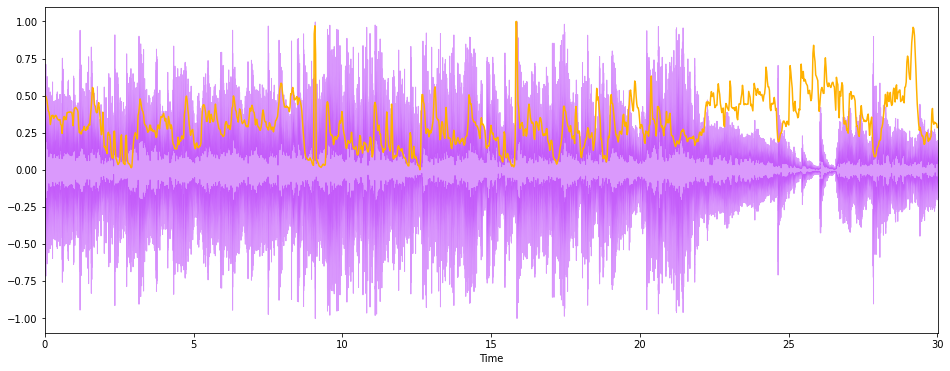

In [74]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

### Mel-Frequency Cepstral Coefficients:

* The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


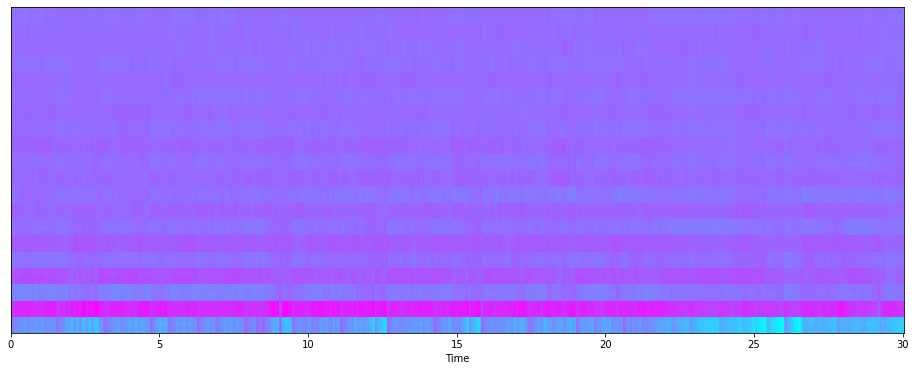

In [75]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data needs to be scaled:

Mean: 3.5403223e-09 

Var: 0.99999994


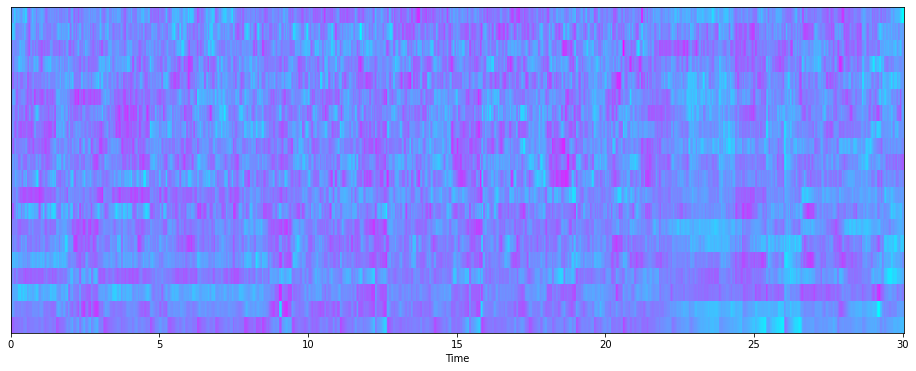

In [76]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

### Chroma Frequencies

* Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


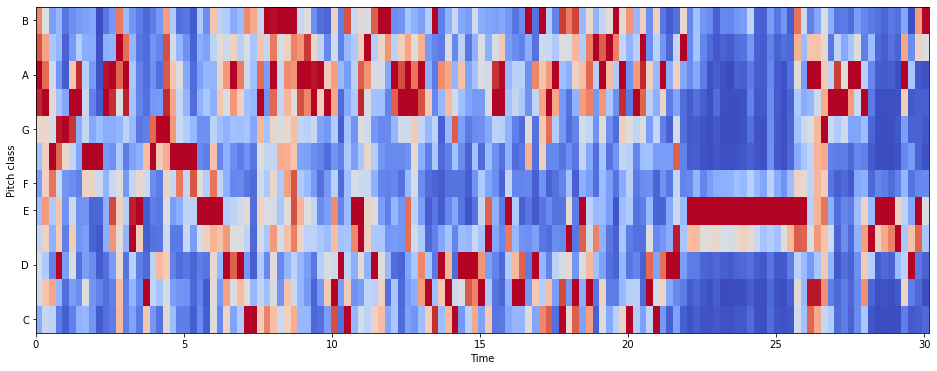

In [77]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## EDA

EDA is going to be performed on the `features_30_sec.csv`. This file contains the mean and variance for each audio file fo the features analysed above. 

So, the table has a final of 1000 rows (10 genres x 100 audio files) and 60 features (dimensionalities).

In [78]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,percussive_mean,percussive_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,3805.839606,9.015054e+05,0.083045,0.000767,-4.530000e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,3550.522098,2.977893e+06,0.056040,0.001448,1.395810e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506103,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108520,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,3042.260232,7.840345e+05,0.076291,0.001007,2.110000e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,2184.745799,1.493194e+06,0.033309,0.000423,4.580000e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,3579.757627,1.572978e+06,0.101461,0.001954,-1.760000e-05,0.004814,-0.000010,0.003094,135.999178,-160.337707,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831574,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [79]:
data.describe() # Data summary by Pandas

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,percussive_mean,percussive_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155166,4571.549304,1.844345e+06,0.103612,0.002986,-3.659331e-04,0.012540,-0.000395,5.670073e-03,119.505363,-144.472987,3747.875414,99.554278,706.899539,-8.920291,468.286436,36.292447,220.447219,-1.144840,174.404462,14.633491,127.232071,-5.129038,116.367019,10.119172,88.198988,-6.994062,88.566933,7.729785,81.733490,-6.021069,75.551228,4.471693,68.670817,-4.795884,67.871712,1.781900,64.764096,-3.869308,62.873761,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666325,1574.791602,1.425085e+06,0.041821,0.003024,1.683946e-03,0.011653,0.001082,6.500325e-03,28.264176,100.229406,2770.558394,31.330873,439.120256,21.690676,287.143462,16.664665,116.236941,12.221340,100.767823,11.839591,68.475115,9.940460,58.400048,10.463270,41.048213,8.283921,39.494072,7.937309,36.733649,6.817013,38.135183,6.715787,32.625534,6.170181,33.154276,5.008385,34.450290,4.873599,33.904101,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185060,749.140636,1.468612e+04,0.021697,0.000044,-2.606458e-02,0.000049,-0.007150,8.300000e-07,54.978391,-552.120056,174.571365,-1.461542,93.104752,-89.870193,35.467754,-18.727547,34.263149,-38.890347,29.912008,-28.415911,20.847921,-32.930431,29.027332,-24.915823,22.464230,-31.640573,25.825863,-12.050177,19.273201,-28.057501,21.402756,-15.796446,18.642517,-27.523129,17.293922,-12.594489,14.250607,-17.539125,9.769691,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697312,1.843505e+05,1907.240605,67376.554430,3380.069642,7.727312e+05,0.070244,0.001079,-1.041582e-04,0.004383,-0.000537,1.292592e-03,99.384014,-200.763893,1844.488129,76.779915,398.020767,-24.219811,270.466576,24.108212,129.397377,-9.979157,101.266209,5.098573,76.505194,-12.870810,73.546917,1.609181,57.349041,-13.246939,59.882313,1.620753,55.734016,-10.964135,51.242420,-0.547371,46.854038,-9.357906,46.294396,-1.639417,43.416593,-7.165884,42.236251,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548050,4658.524473,1.476115e+06,0.0995

[Reference website: Lower quartile, upper quartile, median, and interquartile range](https://www.onlinemathlearning.com/quartile.html)
### Correlation Heatmap for feature means

Text(0.5, 1.0, 'Correlation Heatmap (for the MEAN variables)')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 <a list of 28 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 <a list of 28 Text major ticklabel objects>)

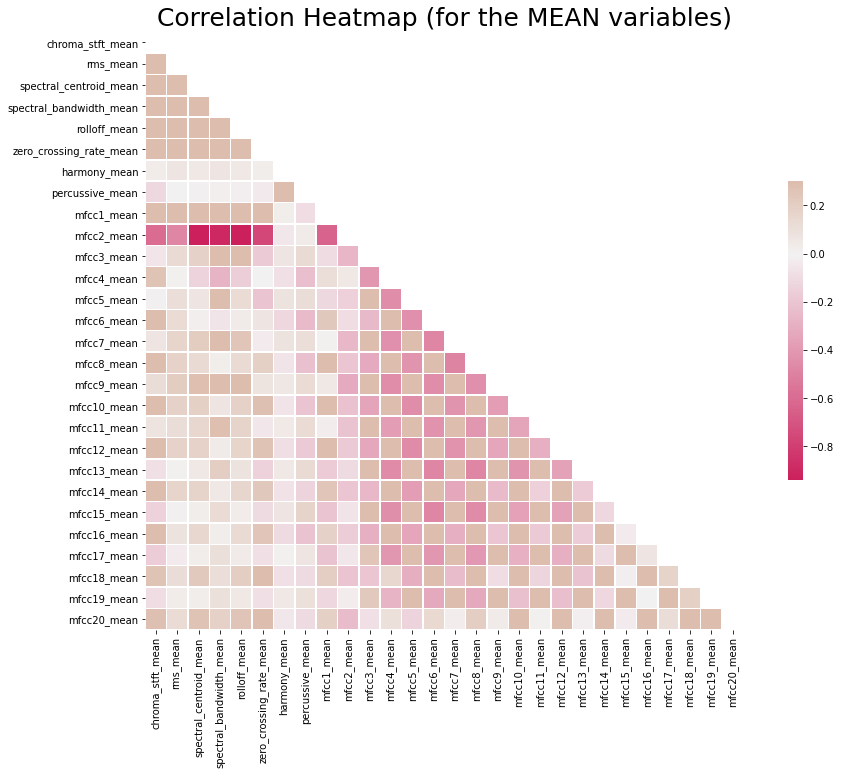

In [80]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

### Box Plot for Genres Distributions

Text(0.5, 1.0, 'BPM Boxplot for Genres')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

(array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'BPM')

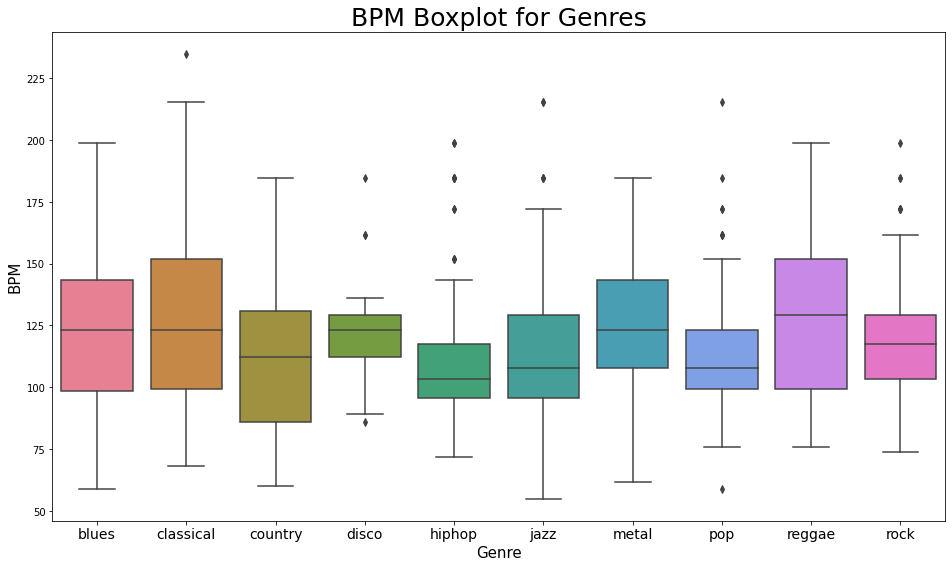

In [81]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg") 

From the boxplot for genres, you could observe centre, spread, and outliers.
### Principal Component Analysis - to visualize possible groups of genres

1. Normalization
2. PCA
3. The Scatter Plot

In [82]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'PCA on Genres')

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 <a list of 7 Text major ticklabel objects>)

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

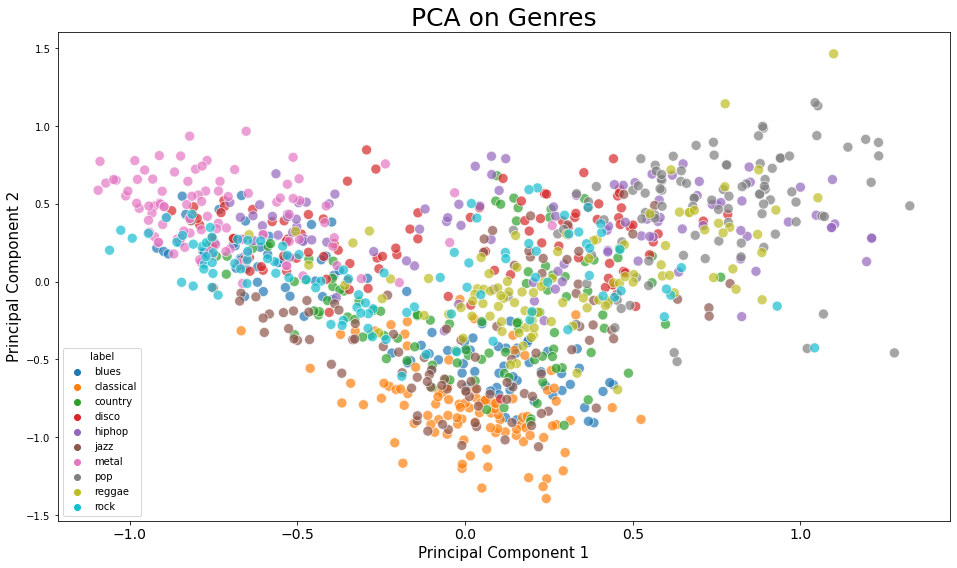

In [83]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Machine Learning Classification

Using the `features_3_sec.csv` file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

### Libraries

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

### Reading in the Data

Now let's try to predict the Genre of the audio using Machine Learning techniques.

In [85]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,percussive_mean,percussive_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421226,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333303,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308785,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Features and Target variable

* creates the target and feature variables
* normalizes the data

In [86]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

### Splitting the data into training and testing

* 70% - 30% split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating a Predefined function to assess the accuracy of a model

* input is the model
* fits the model on the training dataset
* predicts on the testing features
* compares the predictions with the actuals

In [88]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### Trying 10 different models to assess their performance

We tried 10 classification models, the best performing model was XGBooster.

In [89]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

[[100   6  61  12   1  19  85   0  12  23]
 [  0 275   1   0   0  21   0   0   1  10]
 [ 20  11 166  25   4   8  22  11  10   9]
 [ 13   4  30 102  13   2  57  46  17  17]
 [  8   1  15  36 109   0  44  60  36   2]
 [ 10  59  34   6   0 117   8  13   5  34]
 [  5   0   3  11   3   0 269   0   3   9]
 [  0   0  17  18   2   1   0 208  13   8]
 [ 19   1  61  10  23   3   6  29 149  15]
 [  8   6  49  40   2   7  96  13  17  62]]
Accuracy Naive Bayes : 0.51952 

[[222   5  13   6  19  18  15   0   8  13]
 [  2 296   3   0   0   6   0   0   0   1]
 [ 26   5 154   7  12  30   0  11  12  29]
 [  4   9  17 134  69   6   2  22  11  27]
 [  6   5   8   2 250   0   6  13  18   3]
 [ 14  39   5   0   3 210   0   2   7   6]
 [ 11   0   7  11  14   0 238   0   4  18]
 [  0   2   6   3  25   2   0 216   5   8]
 [  9   2  14   9  73   5   0   3 189  12]
 [ 35   6  23  28  32  25  10   9  25 107]]
Accuracy Stochastic Gradient Descent : 0.67267 

[[256   5  22   4   2   8   6   0  10   6]
 [  0 297   1

### XGBoost is the winner - 88.0% accuracy

* create the final model
* compute confusion matrix
* Compute Feature Importance

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy : 0.87955 



<Figure size 1152x648 with 0 Axes>

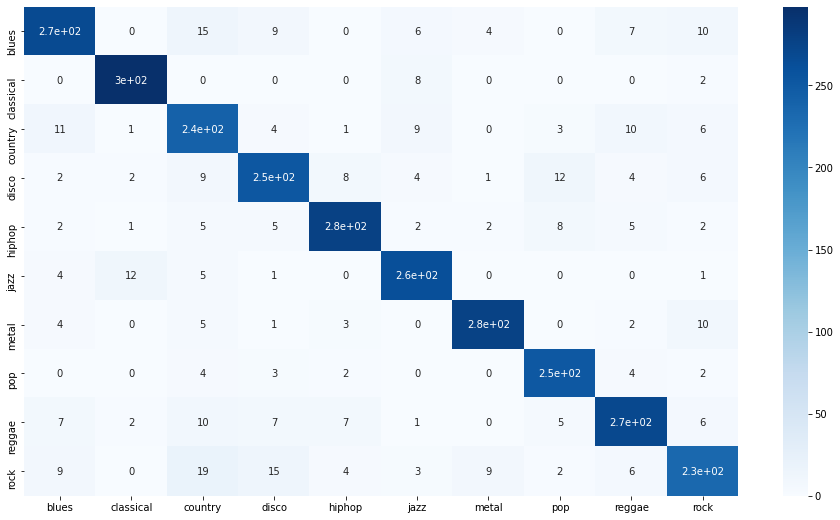

In [90]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### Feature Importance

In [91]:
!pip3 install eli5

In [92]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.05,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=1000, n_jobs=1,
                                              nthread=None,
                                              objective='multi:softprob',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                    

Weight,Feature
0.0870 ± 0.0094,percussive_var
0.0508 ± 0.0068,percussive_mean
0.0465 ± 0.0067,harmony_mean
0.0383 ± 0.0044,mfcc4_mean
0.0325 ± 0.0030,chroma_stft_mean
0.0274 ± 0.0054,harmony_var
0.0262 ± 0.0050,rms_var
0.0190 ± 0.0024,mfcc11_mean
0.0186 ± 0.0045,mfcc9_mean
0.0164 ± 0.0029,tempo
